# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.sparse 

for p in [np, pd, scipy, sklearn]:
    print (p.__name__, p.__version__)

pd.set_option('display.max_columns', 50)

numpy 1.18.5
pandas 1.0.5
scipy 1.5.0
sklearn 0.23.1


# Loading the Data

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a8b20409954b436782cd28cf3fc8d329 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='AlyMskLOMq1lhsHGa3QEwU9puwExEtupVBRk73In7S5K',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_a8b20409954b436782cd28cf3fc8d329.get_object(Bucket='buildathonproject-donotdelete-pr-73wza3op7avods',Key='Churn_Modelling.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Exploration

In [6]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [32]:
df_data_1.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [42]:
low_card_cols= [c for c in df_data_1.columns if df_data_1[c].nunique()<12]
for col in low_card_cols:
    print('Value counts for: ', col)
    print(df_data_1[col].value_counts())
    print('/----------------------------------------------/')
    print()

Value counts for:  Geography
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
/----------------------------------------------/

Value counts for:  Gender
Male      5457
Female    4543
Name: Gender, dtype: int64
/----------------------------------------------/

Value counts for:  Tenure
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
/----------------------------------------------/

Value counts for:  NumOfProducts
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
/----------------------------------------------/

Value counts for:  HasCrCard
1    7055
0    2945
Name: HasCrCard, dtype: int64
/----------------------------------------------/

Value counts for:  IsActiveMember
1    5151
0    4849
Name: IsActiveMember, dtype: int64
/----------------------------------------------/

Value counts for:  Exited
0    7963
1    2037
Name: Exited, d

# Data Visualization

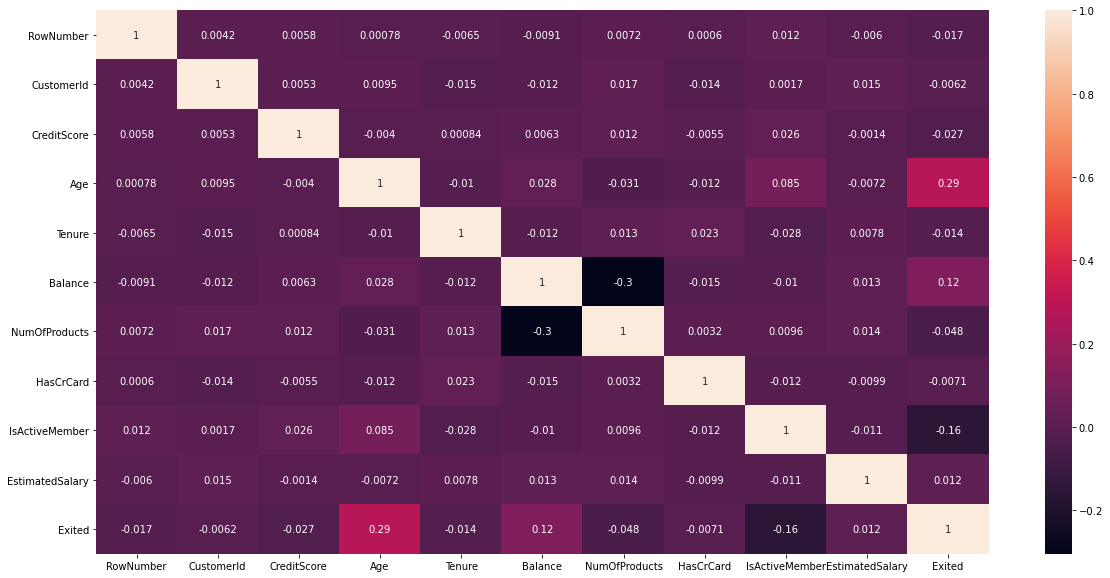

In [5]:
plt.figure(figsize=(20,10))
corrMatrix= df_data_1.corr()
sns.heatmap(corrMatrix, annot=True)

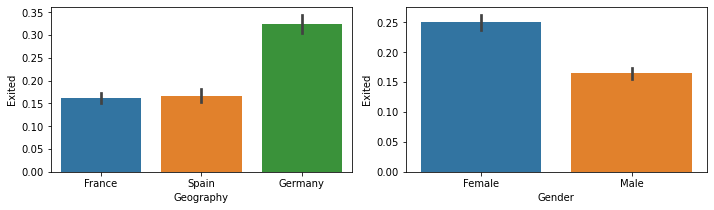

In [21]:
cat_cols= [c for c in df_data_1.columns if df_data_1[c].dtype == "object" and df_data_1[c].nunique()<20]
fig=plt.figure(figsize=(10,3))
ind=0
for col in cat_cols:
    plt.subplot(1,2,ind+1)
    ind+=1
    sns.barplot(x=df_data_1[col], y=df_data_1['Exited'])
fig.tight_layout(pad=1.0)

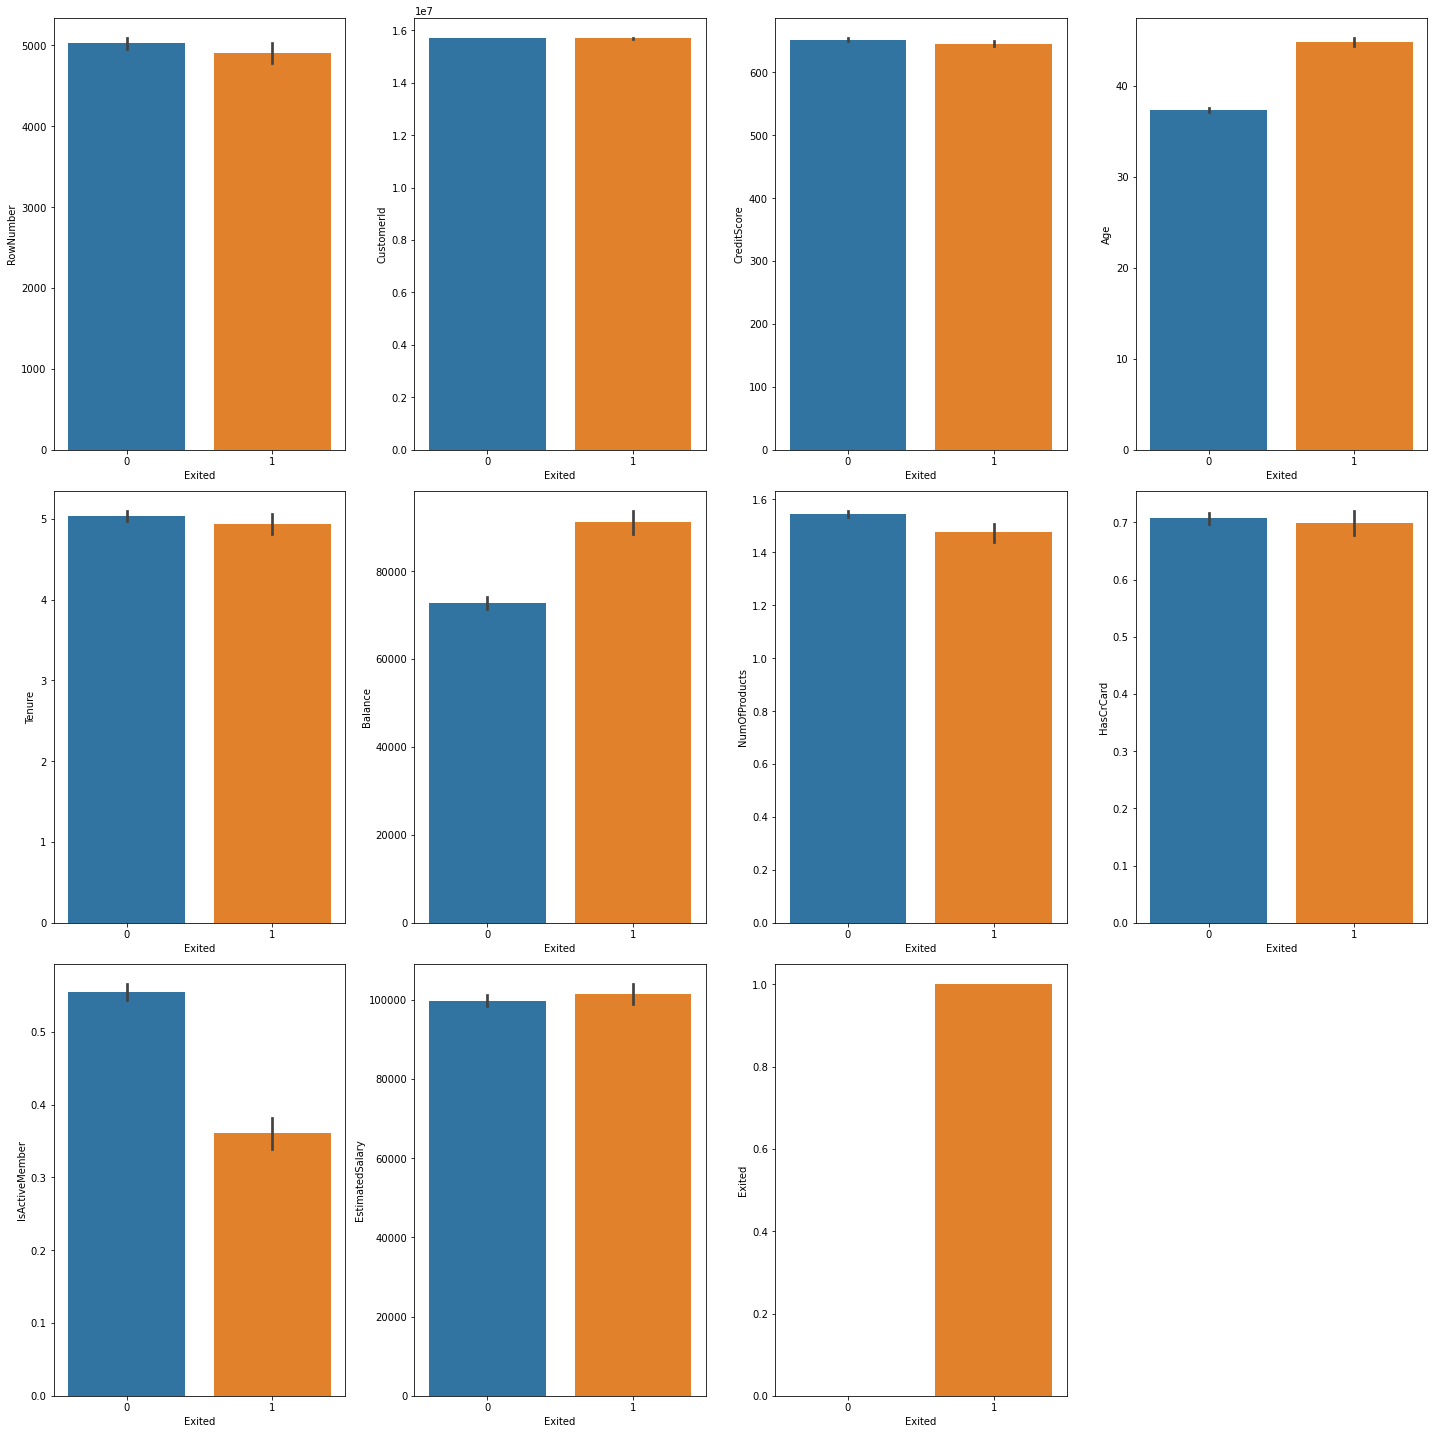

In [31]:
num_cols= [c for c in df_data_1.columns if df_data_1[c].dtype != "object"]
fig=plt.figure(figsize=(20,20))
ind=0
for col in num_cols:
    plt.subplot(3,4,ind+1)
    ind+=1
    sns.barplot(x= df_data_1['Exited'], y= df_data_1[col])
fig.tight_layout(pad=1.0)

# Handling Missing Values

In [45]:
df_data_1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Train/Test Splitting the Data

I moved Train/Test Splitting the Data up here in order to have a proper validation with the internal data and to have similar result while validating with external data. 
One Hot Encoder should be fitted only with training data.
Validation data as well as future data will be prcocessed with this same Encoder.

In [50]:
from sklearn.model_selection import train_test_split

y= df_data_1['Exited']
x= df_data_1.drop(['Exited'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2021)

# One Hot Encoding

In [54]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore' ,sparse=False)

ohe_cols_train= pd.DataFrame(ohe.fit_transform(X_train[cat_cols]))
ohe_cols_val= pd.DataFrame(ohe.transform(X_val[cat_cols]))

ohe_cols_train.index= X_train.index
ohe_cols_val.index= X_val.index


passby_train_x= X_train.drop(cat_cols, axis=1)
passby_val_x= X_val.drop(cat_cols, axis=1)

= pd.concat([passby_train_x, ohe_cols_train], axis=1)
ohe_X_val= pd.concat([passby_val_x, ohe_cols_val], axis=1)

In [56]:
ohe_X_train.drop(['Surname'], axis=1, inplace= True)
ohe_X_val.drop(['Surname'], axis=1, inplace= True)

# Scaling the Data

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_train = scaler.fit_transform(ohe_X_train)
scaled_val= scaler.transform(ohe_X_val)

# Training the Model

In [63]:
from sklearn.metrics import accuracy_score
simple_xgb= XGBClassifier(random_state = 2021)
simple_xgb.fit(scaled_train, y_train)
xgb_preds= simple_xgb.predict(scaled_val)

print ('Simple xgb: ', accuracy_score(y_val, xgb_preds))

Simple xgb:  0.8585


In [115]:
xgb=XGBClassifier(n_jobs=-1, seed=7, min_child_weight=0.4, n_estimators=200)

xgb.fit(scaled_train, y_train, eval_metric="mae", eval_set=[(scaled_train, y_train), (scaled_val, y_val)], verbose=True, early_stopping_rounds = 20)
xgb_preds= xgb.predict(scaled_val)
print ('xgb: ', accuracy_score(y_val, xgb_preds))

[0]	validation_0-mae:0.473896	validation_1-mae:0.474349
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 20 rounds.
[1]	validation_0-mae:0.450486	validation_1-mae:0.451208
[2]	validation_0-mae:0.429302	validation_1-mae:0.430377
[3]	validation_0-mae:0.410361	validation_1-mae:0.411673
[4]	validation_0-mae:0.392435	validation_1-mae:0.393958
[5]	validation_0-mae:0.377007	validation_1-mae:0.378872
[6]	validation_0-mae:0.362888	validation_1-mae:0.364985
[7]	validation_0-mae:0.350243	validation_1-mae:0.352731
[8]	validation_0-mae:0.338926	validation_1-mae:0.341429
[9]	validation_0-mae:0.328999	validation_1-mae:0.331596
[10]	validation_0-mae:0.319274	validation_1-mae:0.322047
[11]	validation_0-mae:0.310847	validation_1-mae:0.313648
[12]	validation_0-mae:0.302983	validation_1-mae:0.306046
[13]	validation_0-mae:0.296192	validation_1-mae:0.299564
[14]	validation_0-mae:0.289236	validation_1-mae:0.29298

In [86]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [116]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV 
xgb_h = XGBClassifier(seed=7)

param_grid = {
    'n_estimators': [200],
    #'colsample_bytree': [0.75, 0.8, 0.85],
    #'max_depth': [5, 10, 15, 20, 25],
    #'reg_alpha': [1, 0.1],
    #'reg_lambda': [2, 5, 10],
    #'subsample': [0.55, 0.6, .65],
    #'learning_rate':[0.5, 0.1],
    #'gamma':[0.5, 1, 2],
    'min_child_weight':[0.4],
    #'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb_h, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_xgb = clf_xgb.fit(scaled_train, y_train)
xgb_preds= best_xgb.predict(scaled_val)
print ('xgb: ', accuracy_score(y_val, xgb_preds))
clf_performance(best_xgb,'XGB')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


xgb:  0.863
XGB
Best Score: 0.86525
Best Parameters: {'min_child_weight': 0.4, 'n_estimators': 200}
